# Лабораторная работа № 1 (практическая часть)

In [19]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('enter phystech e-mail\n') 
    to_hash =  mail.strip().split('@')[0]    
    h = crc32(to_hash.encode('utf-8'))
    seed = h%(2**32-1)
    rs = np.random.RandomState(seed)
    task1 = rs.randint(low=1, high=5)
    task2 = rs.randint(low=1, high=5)
    task3 = rs.randint(low=1, high=5)
    task4 = rs.randint(low=1, high=4)
    print ('Your tasks are 1.{}, 2.{}, 3.{}, 4.{}'.format(task1, task2, task3, task4))

enter phystech e-mail
sadiev.aa@phystech.edu
Your tasks are 1.1, 2.4, 3.2, 4.3


In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
import pandas as pd

# Task 1

Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:
1. Нормальное
2. Лапласа
3. Стьюдента
4. Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

Критерий консервативен — истинная вероятность ошибки первого рода ограничена уровнем значимости сверху

Поскольку все критерии на проверку нормальности, то для нормальной выборки мы проверяем консервативность, для других считаме мощность.

In [3]:
np.random.seed(42)
normal = np.random.normal(0, 1, 10)
laplace = np.random.laplace(0,1, 10000)
s = np.random.standard_t(10, 1000)

KstestResult(statistic=0.05133432152032645, pvalue=2.5814545015677514e-23)

In [4]:
p = []
for i in range(1000):
            normal = np.random.normal(0, 1, 100)
            p_value = st.kstest(normal, 'norm')[1]
            if p_value > 0.05:
                p.append(1)
            else:
                p.append(0)
power = sum(p)/len(p) * 100
power

94.0

In [5]:
def calculate_power(label, n, N):
    
    if label == 'normal':
        p_jb = []
        p_sw = []
        p_l = []
       

        for i in range(N):
            normal = np.random.normal(0, 1, n)
            p_value_jb = st.jarque_bera(normal)[1]
            p_value_sw = st.shapiro(normal)[1]
            p_value_l = st.kstest(normal, 'norm')[1]
            
            if p_value_jb > 0.05:
                p_jb.append(1)
            else:
                p_jb.append(0)
                
            if p_value_sw > 0.05:
                p_sw.append(1)
            else:
                p_sw.append(0)
                
            if p_value_l > 0.05:
                p_l.append(1)
            else:
                p_l.append(0)
                
        
    elif label == 'laplace':
        p_jb = []
        p_sw = []
        p_l = []

        for i in range(N):
            laplace = np.random.laplace(0, 1, n)
            p_value_jb = st.jarque_bera(laplace)[1]
            p_value_sw = st.shapiro(laplace)[1]
            p_value_l = st.kstest(laplace, 'norm')[1]
            
            if p_value_jb > 0.05:
                p_jb.append(1)
            else:
                p_jb.append(0)
                
            if p_value_sw > 0.05:
                p_sw.append(1)
            else:
                p_sw.append(0)
                
            if p_value_l > 0.05:
                p_l.append(1)
            else:
                p_l.append(0)
                
        
    elif label == 'student':
        p_jb = []
        p_sw = []
        p_l = []
        
        for i in range(N):
            s = np.random.standard_t(10, n)
            p_value_jb = st.jarque_bera(s)[1]
            p_value_sw = st.shapiro(s)[1]
            p_value_l = st.kstest(s, 'norm')[1]
            
            if p_value_jb > 0.05:
                p_jb.append(1)
            else:
                p_jb.append(0)
                
            if p_value_sw > 0.05:
                p_sw.append(1)
            else:
                p_sw.append(0)
                
            if p_value_l > 0.05:
                p_l.append(1)
            else:
                p_l.append(0)
                
        
                
    elif label == 'truncnorm':
        p_jb = []
        p_sw = []
        p_l = []
        
        for i in range(N):
            tr_norm = st.truncnorm.rvs(-2, 2, size=n)
            p_value_jb = st.jarque_bera(tr_norm)[1]
            p_value_sw = st.shapiro(tr_norm)[1]
            p_value_l = st.kstest(tr_norm, 'norm')[1]
            if p_value_jb > 0.05:
                p_jb.append(1)
            else:
                p_jb.append(0)
            if p_value_sw > 0.05:
                p_sw.append(1)
            else:
                p_sw.append(0)
            if p_value_l > 0.05:
                p_l.append(1)
            else:
                p_l.append(0)
                
    power_jb= 1 - sum(p_jb)/len(p_jb) 
    power_sw = 1 - sum(p_sw)/len(p_sw) 
    power_l = 1 - sum(p_l)/len(p_l) 
                          
    
    return (label, [('Jarque-Bera',power_jb), ('Lilliefors',power_l), ('Shapiro-Wilk',power_sw)] )

In [28]:
N = 500
conservatism_normal = []
power_laplace = []
power_student = []
power_truncnormal = []

for n in range(10, 10001, 500):
    conservatism_normal.append(calculate_power('normal', n, N)[1])
    power_laplace.append(calculate_power('laplace', n, N)[1])
    power_student.append(calculate_power('student', n, N)[1])
    power_truncnormal.append(calculate_power('truncnorm', n, N)[1])
    

/Users/abdurakhmonsadiev/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


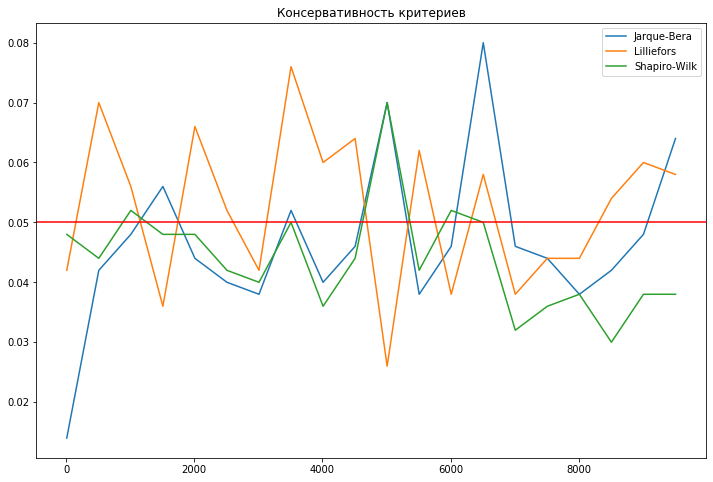

In [29]:
Jarque_Bera_normal = [conservatism_normal[i][0][1]for i in range(len(conservatism_normal))]
Lilliefors_normal = [conservatism_normal[i][1][1]for i in range(len(conservatism_normal))]
Shapiro_Wilk_normal = [conservatism_normal[i][2][1]for i in range(len(conservatism_normal))]
plt.figure(figsize = (12, 8))
plt.plot(range(10, 10001, 500) , Jarque_Bera_normal, label = 'Jarque-Bera')
plt.plot(range(10, 10001, 500) , Lilliefors_normal, label = 'Lilliefors')
plt.plot(range(10, 10001, 500) , Shapiro_Wilk_normal, label = 'Shapiro-Wilk')
plt.axhline(0.05, color = 'red')
plt.title('Консервативность критериев')
plt.legend()
plt.show()

По графику видно, что Шапиро-Уилка процедура самая консервативная среди всех. Причем начиная с 5000 данных она всегда консервативна.

In [30]:
N = 200
conservatism_normal = []
power_laplace = []
power_student = []
power_truncnormal = []

for n in range(10, 5001, 100):
    conservatism_normal.append(calculate_power('normal', n, N)[1])
    power_laplace.append(calculate_power('laplace', n, N)[1])
    power_student.append(calculate_power('student', n, N)[1])
    power_truncnormal.append(calculate_power('truncnorm', n, N)[1])
    

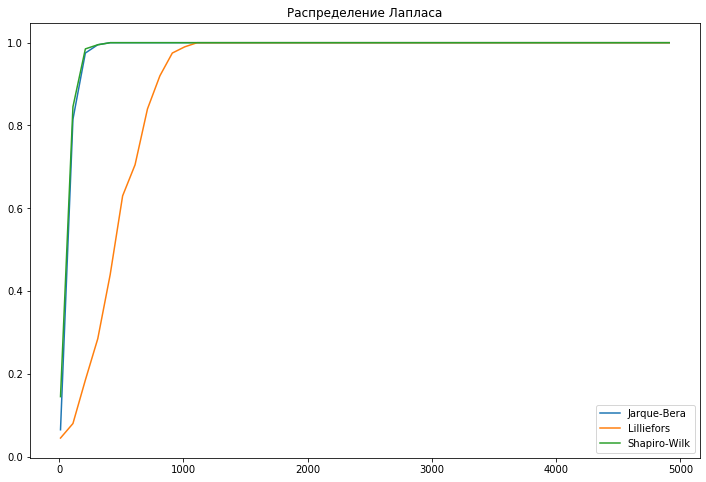

In [31]:
Jarque_Bera_laplace = [power_laplace[i][0][1]for i in range(len(power_laplace))]
Lilliefors_laplace = [power_laplace[i][1][1]for i in range(len(power_laplace))]
Shapiro_Wilk_laplace = [power_laplace[i][2][1]for i in range(len(power_laplace))]
plt.figure(figsize = (12, 8))
plt.plot(range(10, 5001, 100) , Jarque_Bera_laplace, label = 'Jarque-Bera')
plt.plot(range(10, 5001, 100), Lilliefors_laplace, label = 'Lilliefors')
plt.plot(range(10, 5001, 100), Shapiro_Wilk_laplace, label = 'Shapiro-Wilk')
plt.title('Распределение Лапласа')
plt.legend()
plt.show()

Как мы видем опять Шапиро-Вилка впереди планеты всей.

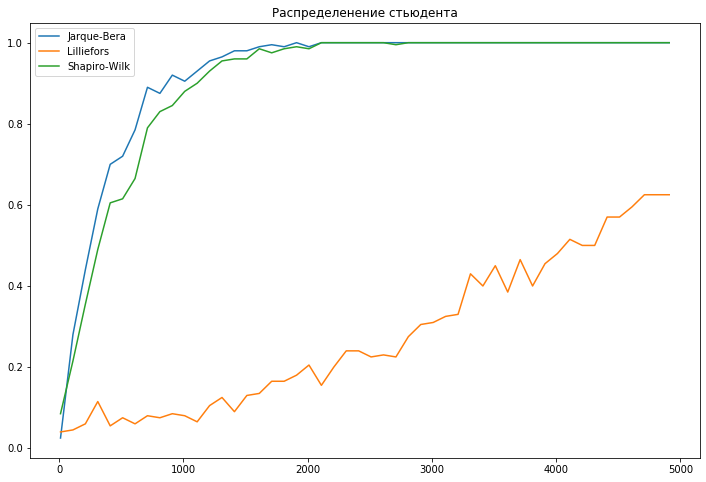

In [32]:
Jarque_Bera_student = [power_student[i][0][1]for i in range(len(power_student))]
Lilliefors_student = [power_student[i][1][1]for i in range(len(power_student))]
Shapiro_Wilk_student = [power_student[i][2][1]for i in range(len(power_student))]
plt.figure(figsize = (12, 8))
plt.plot(range(10, 5001, 100) , Jarque_Bera_student, label = 'Jarque-Bera')
plt.plot(range(10, 5001, 100) , Lilliefors_student, label = 'Lilliefors')
plt.plot(range(10, 5001, 100) , Shapiro_Wilk_student, label = 'Shapiro-Wilk')
plt.title('Распределенение стьюдента')
plt.legend()
plt.show()

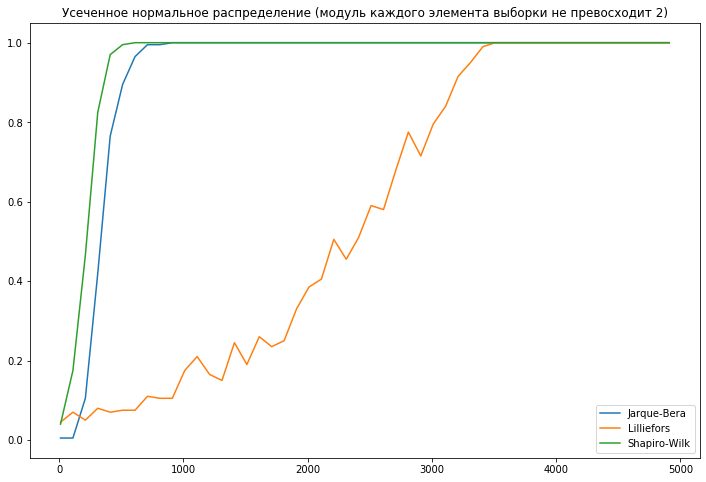

In [33]:
Jarque_Bera_truncnormal = [power_truncnormal[i][0][1]for i in range(len(power_truncnormal))]
Lilliefors_truncnormal = [power_truncnormal[i][1][1]for i in range(len(power_truncnormal))]
Shapiro_Wilk_truncnormal = [power_truncnormal[i][2][1]for i in range(len(power_truncnormal))]
plt.figure(figsize = (12, 8))
plt.plot(range(10, 5001, 100) , Jarque_Bera_truncnormal, label = 'Jarque-Bera')
plt.plot(range(10, 5001, 100) , Lilliefors_truncnormal, label = 'Lilliefors')
plt.plot(range(10, 5001, 100) , Shapiro_Wilk_truncnormal, label = 'Shapiro-Wilk')
plt.title('Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)')
plt.legend()
plt.show()

Хочется отметить, что критерий Лиллиефорса показал себя хуже всех, ну как и стоило ожидать. Это объясняется тем, что он не чувствителен к различиям на хвостах распределений, это хорошо видно, если сравнивать графики для распределения стьюдента и усеченного нормального, в точках близких к моде совпадают примерно графики с нормальным распределением, а хвосты различаются, у стьюдета они более тяжелые, а у усеченного конечно намного легче.

Поэтому стоит рассматривать критерий Харке-Бера и критреий Шапиро-Уилка. Шапиро-Уилка получился мощнее, чем Харке-Бера, для усеченного нормального и для Лапласа, для стьюдента иначе. Это меня наводит на то, что в больших случаях конечно можно использовать критерий Шапиро-Уилка, поскольку теория говорит, что он наиболее мощный критерий. 

Конечно стоит обратить внимание, когда выборка мала. Мы имеем, что все критерии плохо себя показали, это и объясняется тем, что любой критерий может пропустить отклонения от нормальности.

Но Шапиро-Уилка показал лушчий показатель в плане консервативности.